<a href="https://colab.research.google.com/github/RonakMehta21/Machine-Learning/blob/master/LSTM%20with%20pre-trained%20GloVe%20Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.externals import joblib
from joblib import Parallel, delayed
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# System related libraries
import os
import re
import fnmatch
import importlib
import multiprocessing
from joblib import Parallel, delayed
from datetime import datetime
from time import time

# Formatting
import pprint
from tabulate import tabulate
from IPython.display import display, HTML

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

# Handle table-like data and matrices
import pickle
import numpy as np
import pandas as pd

# Collections
import operator
from itertools import product, compress
from functools import reduce
from operator import itemgetter
from collections import defaultdict, Counter
from glob import glob

from sklearn.utils import shuffle
from sklearn.externals import joblib

# Data Visualization
from wordcloud import WordCloud

# String, NLTK, Gensim libraries
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import gensim.downloader as api
from gensim.models import FastText
from gensim.models import KeyedVectors

# Sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, Normalizer, normalize, scale, FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KernelDensity, KNeighborsClassifier
from skimage.transform import resize as imresize

# Modelling Algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, classification_report, log_loss, auc, roc_auc_score, roc_curve, f1_score, precision_recall_curve, recall_score, precision_score

# Keras
from keras.utils import to_categorical, plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers.embeddings import Embedding
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, BatchNormalization

from keras.models import Model, Sequential, model_from_json, load_model

from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard, Callback, CSVLogger
from keras import backend as K

# Model Optimization
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, rand, pyll
from hyperopt.pyll.base import scope
from hyperopt.pyll.stochastic import sample

from scipy.stats.kde import gaussian_kde

# Visualization using Matplotlib, Seaborn, Plotly
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set_style('white')

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

%matplotlib inline
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from scipy import sparse
# Code source: https://degravek.github.io/project-pages/project1/2017/04/28/New-Notebook/
# Dataset from Chakraborty et al. (https://github.com/bhargaviparanjape/clickbait/tree/master/dataset)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
# Read text file into colaboratory
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# Google drive link where the dataset is stored.
link = 'https://drive.google.com/open?id=19N9D6JONrA75Pd32hl228UoCxZs4K2cF'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

19N9D6JONrA75Pd32hl228UoCxZs4K2cF


In [0]:
# Download the text file.
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('fake_news_train.csv')

In [6]:
# Google drive link where the dataset is stored.
link = 'https://drive.google.com/open?id=1QP8PL-QCAH2nJto7IBVI_k7TaG0K76G0'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1QP8PL-QCAH2nJto7IBVI_k7TaG0K76G0


In [0]:
# Download the text file.
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('fake_news_test.csv')

In [8]:
# Google drive link where the dataset is stored.
link = 'https://drive.google.com/open?id=1IY6TLlXcH27-HQhAOu7KoxvHl1nvymO0'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1IY6TLlXcH27-HQhAOu7KoxvHl1nvymO0


In [0]:
# Download the text file.
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('glove.6B.300d.txt')

In [0]:
train = pd.read_csv('fake_news_train.csv')
test = pd.read_csv('fake_news_test.csv')

In [11]:
# Display check the dimensions and the first 2 rows of the file.
print('Fake News Dataset')
print('train dim:',train.shape, 'test dim:', test.shape)
train.iloc[0:2]

Fake News Dataset
train dim: (20800, 5) test dim: (5200, 4)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


## **Data Cleaning and Text Preprocessing**

*Steps included in the preprocessing:*

* Remove Special Characters and Punctuations
* Lower case the news
* Tokenization
* Remove Stop Words
* Lemmatization
* Stemming
* Spell Check


## Putting It All Together

To make the code reusable, we need to create a function that can be called many times.

In [0]:
import re

def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", str(raw_news))
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [13]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
train['clean'] = train['text'].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train), "news:", (t2-t1)/60, "min")

t1 = time.time()
test['clean'] = test['text'].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem train data: 
 20800 news: 3.5365283648173014 min


Time to clean, tokenize and stem test data: 
 5200 news: 0.8856431444485983 min


In [14]:
df_fake = train[['clean','label']]
df_fake

,clean,label
0,hous dem aid even see comey letter jason chaff...,1
1,ever get feel life circl roundabout rather hea...,0
2,truth might get fire octob tension intellig an...,1
3,video civilian kill singl u airstrik identifi ...,1
4,print iranian woman sentenc six year prison ir...,1
...,...,...
20795,rapper unload black celebr met donald trump el...,0
20796,green bay packer lost washington redskin week ...,0
20797,maci today grew union sever great name america...,0
20798,nato russia hold parallel exercis balkan press...,1


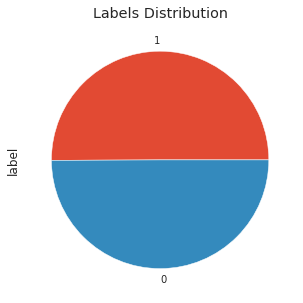



Classes:  [0 1]

Number of One Hot encoded class labels:  2


In [15]:
# Encode labels into categorical values

train = df_fake.clean
label = df_fake.label

# Plot of label types numbers
pd.Series(label).value_counts().plot(
    kind='pie', title='Labels Distribution', figsize=(5, 5))
plt.show()

# Encode labels and create classes
le = LabelEncoder()
le.fit(label)
label_encoded = le.transform(label)
print("\n\nClasses: ", le.classes_)

# Convert labels into categorical values
label_onehot = to_categorical(label_encoded)
print("\nNumber of One Hot encoded class labels: ", label_onehot.shape[1])

In [0]:
vocab_size = 300
maxlen = 300
batch_size = 32
epochs = 10
embedding_type = 'glove_embed_tokenizer'

seed = 21
np.random.seed(seed)

In [17]:
%time

# Splitting data into train, test & validation sets
x_train, x_val_test, y_train, y_val_test = train_test_split(
    train, label_onehot, test_size=.4, stratify=label_encoded, random_state=seed)

x_val, x_test, y_val, y_test = train_test_split(
    x_val_test, y_val_test, test_size=.6, stratify=y_val_test, random_state=seed)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


In [18]:
# Create the tokenizer & fit on all the url texts

tokenizer = Tokenizer(num_words=vocab_size, lower=True)
tokenizer.fit_on_texts(x_train)

# Dumping tokenizer using joblib which is faster than pickle
joblib.dump(tokenizer, os.path.join('/content/tokenizer.pickle'))

# Generating sequences & padding for efficient training of our neural network
# Transforms each text in texts to a sequence of integers.
train_sequences = tokenizer.texts_to_sequences(x_train)
train_padded_sequences = sequence.pad_sequences(train_sequences, maxlen=maxlen)

val_sequences = tokenizer.texts_to_sequences(x_val)
val_padded_sequences = sequence.pad_sequences(val_sequences, maxlen=maxlen)

test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded_sequences = sequence.pad_sequences(test_sequences, maxlen=maxlen)

del x_train, train_sequences, x_val, val_sequences, x_test, test_sequences


# Load Glove embeddings

print('Loading Glove word vectors ...')
embeddings_index = dict()

try:
    f = open('/content/glove.6B.300d.txt')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
except Exception as e:
    print('Stacktrace', e)
    print('Glove file does not exist.')
finally:
    f.close()

print('Loaded %s Glove word vectors.' % len(embeddings_index))


# Create a weight matrix for all the words

print('\nMapping words to Glove embeddings ...')
embedding_matrix = np.zeros((vocab_size, maxlen))

for word, index in tokenizer.word_index.items():
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

print('Shape of Embedding Matrix: ', embedding_matrix.shape)
print('Glove Mapping done.')

Loading Glove word vectors ...
Loaded 400000 Glove word vectors.

Mapping words to Glove embeddings ...
Shape of Embedding Matrix:  (300, 300)
Glove Mapping done.


In [0]:
# Checking labels, predictions shape


def check_units(y_true, y_pred):

    if (y_pred.shape[1] != 1):
        y_pred = y_pred[:, 1:2]
        y_true = y_true[:, 1:2]

    return y_true, y_pred


# Calculate Precision

def precision(y_true, y_pred):

    y_true, y_pred = check_units(y_true, y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())

    return precision


# Calculate Recall

def recall(y_true, y_pred):

    y_true, y_pred = check_units(y_true, y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())

    return recall


# Calculate F1 Score

def f1(y_true, y_pred):

    # Calculate Recall

    def recall(y_true, y_pred):

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())

        return recall

    # Calculate Precision

    def precision(y_true, y_pred):

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())

        return precision

    y_true, y_pred = check_units(y_true, y_pred)
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [22]:
# Initializing & running keras model

print('\n\n****************** Keras model training started. *******************\n\n')

# Setting checkpoint & early stopping
checkpoint_path = os.path.join('/content/checkpoint','model_best_weights.{epoch:02d}-{val_accuracy:.4f}.hdf5')
checkpoint = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

# prefroc_callback = PrefrocCallback(training_data=(train_padded_sequences, y_train), validation_data=(val_padded_sequences, y_val))

tensorboard = TensorBoard(
    log_dir='./logs', histogram_freq=2000, write_graph=True, write_images=False)

callbacks_list = [checkpoint, tensorboard]

# Running the pipeline
# Fixing the seed again
np.random.seed(seed)

print('\n\nBuild model ...')
model = Sequential()
model.add(Embedding(vocab_size, 300, input_length=maxlen,
                    weights=[embedding_matrix], trainable=False))
model.add(LSTM(maxlen, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

# try using different optimizers and different optimizer configs

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', f1, precision, recall])

print(model.summary())

print('Training starts...')
model.fit(train_padded_sequences, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(val_padded_sequences, y_val),
          verbose=2, callbacks=callbacks_list)



****************** Keras model training started. *******************




Build model ...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 300)          90000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 602       
Total params: 811,802
Trainable params: 721,802
Non-trainable params: 90,000
_________________________________________________________________
None
Training starts...
Train on 12480 samples, validate on 3328 samples
Epoch 1/10
 - 234s - loss: 0.3910 - accuracy: 0.8232 - f1: 0.8162 - precision: 0.8122 - recall: 0.8387 - val_loss: 0.3062 - val_accuracy: 0.8720 - val_f1: 0.8735 - val_precision: 0.8484 - val_recall: 0.9057

E

In [24]:
# Evaluate the model

scores = model.evaluate(test_padded_sequences, y_test,
                        batch_size=batch_size)
print('Loss:', scores[0])
print('Accuracy:', scores[1])

4992/4992 [==============================] - 9s 2ms/step
Loss: 0.24642074818555743
Accuracy: 0.9114583134651184


In [0]:
model.save('/content/model.hdf5')